In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
#facilitates plotting matplotlib graphs just below code cells and storing them in the notebook doc
%matplotlib inline

In [2]:
#comparing P&G to the S&P500
assets = ['PG', '^GSPC']

pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = web.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-12-20,125.360001,3221.219971
2019-12-23,124.900002,3224.010010
2019-12-24,125.220001,3223.379883
2019-12-26,125.220001,3239.909912
2019-12-27,126.089996,3240.020020


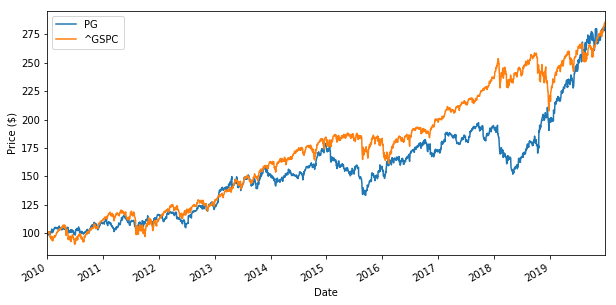

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10, 5))
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()

In [5]:
#in order to obtain the efficient frontier of these assets, we need to find their logarithmic returns
log_returns = np.log(pf_data / pf_data.shift(1))

In [6]:
#printing out the average returns of the two assets
log_returns.mean() * 250

PG       0.103353
^GSPC    0.104528
dtype: float64

In [7]:
#printing the covariance between the two assets
log_returns.cov() * 250

,PG,^GSPC
PG,0.021719,0.011295
^GSPC,0.011295,0.021716


In [8]:
#printing out the correlation matrix between the two assets
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.520064
^GSPC,0.520064,1.000000


In [9]:
#we need to create a porfolio with ...
num_assets = len(assets)
num_assets

2

In [10]:
#randomizing our weights in our porfolio but making sure they add to 1
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.34732185, 0.65267815])

In [11]:
#confirming it adds to 1
weights[0] + weights[1]

1.0

#### Expected Portfolio Return:

In [12]:
#finding the annual return of the weighted assets
np.sum(weights * log_returns.mean()) * 250

0.10412009772058235

#### Expected Portfolio Variance:

In [13]:
#finding the s^2 statistic, tells us the average deviation from the mean
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.0169915963173626

#### Expected Portfolio Volatility:

In [14]:
#finding the s statistic, tells us the standard deviation
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.1303518174685823

---

In [15]:
#we are not considering 1,000 different investments
#rather, we are considering 1,000 different combinations of the same assets!

In [16]:
pfolio_returns = []
pfolio_volatilities = []

#using code from above // .append() adds the generated number to the pfolio array so we can compare different combo's
#we are creating combinations of weights, returns, and volatilities
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

In [17]:
#it is important to convert these arrays into numpy arrays before printing (makes it more organized)
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10390418, 0.10420064, 0.10418771, 0.10405535, 0.10409803,
        0.10413053, 0.10372127, 0.10359479, 0.10380735, 0.10376692,
        0.10389559, 0.10419877, 0.10432167, 0.10409133, 0.10356075,
        0.1039084 , 0.10366699, 0.10350755, 0.10414169, 0.10399404,
        0.1038201 , 0.1041443 , 0.10450873, 0.10417547, 0.10401437,
        0.10413526, 0.10379131, 0.10388389, 0.10389358, 0.10420798,
        0.10373269, 0.10440131, 0.10372853, 0.10402029, 0.10352287,
        0.10394362, 0.10387193, 0.10378078, 0.10362612, 0.10368508,
        0.10376111, 0.10344223, 0.10346632, 0.10408647, 0.10415429,
        0.10431734, 0.10374804, 0.10399296, 0.10387201, 0.10414838,
        0.10359445, 0.10447349, 0.10431317, 0.10339866, 0.10418351,
        0.10406164, 0.10386324, 0.10372475, 0.10373033, 0.10392697,
        0.10428856, 0.10392477, 0.10356096, 0.10353443, 0.10405459,
        0.10396266, 0.10391424, 0.10402408, 0.10445669, 0.10398744,
        0.10433152, 0.1043511 , 0.10399671, 0.10

In [18]:
#creating a 'portfolios' data frame containing the return and volatility data // adding column labels as well
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [19]:
portfolios.head()

,Return,Volatility
0,0.103904,0.128554
1,0.104201,0.132383
2,0.104188,0.132009
3,0.104055,0.129246
4,0.104098,0.129921


In [20]:
portfolios.tail()

,Return,Volatility
995,0.103701,0.131798
996,0.103493,0.139753
997,0.104363,0.138552
998,0.104080,0.129615
999,0.103731,0.131034


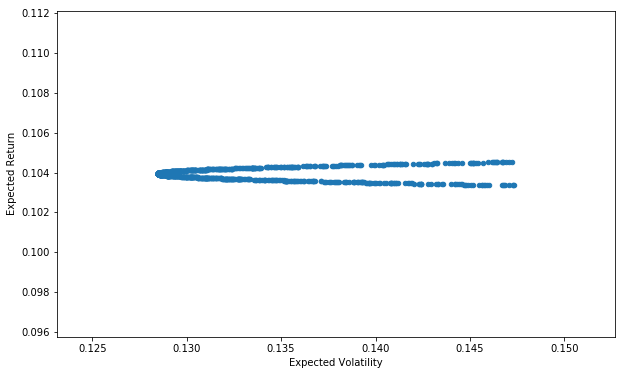

In [21]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()

In [23]:
#we have successfully graphed the Efficient Frontier of these two assets!
#in theory, any portfolio below the top half of the curve would be considered suboptimal